## Import de librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Análisis de datos

In [6]:
df = pd.read_csv('../data/raw/data.csv')

In [7]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [29]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [13]:
df[" Net Income Flag"].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 6819 entries, 0 to 6818
Series name:  Net Income Flag
Non-Null Count  Dtype
--------------  -----
6819 non-null   int64
dtypes: int64(1)
memory usage: 53.4 KB


In [8]:
print(df[" Net Income Flag"].unique())   #net profit or net loss, always 1. Unnecesary
print(df[" Net Income Flag"].value_counts())


[1]
 Net Income Flag
1    6819
Name: count, dtype: int64


In [14]:
df.drop(columns=[" Net Income Flag"], inplace=True)

In [10]:
print(df["Bankrupt?"].unique())
print(df["Bankrupt?"].value_counts())

[1 0]
Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [4]:
print(df["Bankrupt?"].unique())
print(df["Bankrupt?"].value_counts())
print(f"Proporción de la clase 1 (Bankrupt): {df['Bankrupt?'].value_counts()[1]/len(df):.4f}")
print(f"Proporción de la clase 0 (No Bankrupt): {df['Bankrupt?'].value_counts()[0]/len(df):.4f}")

[1 0]
Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Proporción de la clase 1 (Bankrupt): 0.0323
Proporción de la clase 0 (No Bankrupt): 0.9677


In [5]:
# Búsqueda de variables áltamente correlacionadas
def find_highly_correlated_pairs(df, threshold=0.9):
    corr_matrix = df.corr(numeric_only=True)
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]

            if abs(corr_value) >= threshold:
                correlated_pairs.append((var1, var2, corr_value))

    return sorted(correlated_pairs, key=lambda x: -abs(x[2]))

In [7]:
pares = find_highly_correlated_pairs(df, threshold=0.95)
for var1, var2, corr in pares:
    print(f"{var1} <--> {var2} | Correlación: {corr:.3f}")

 Current Liabilities/Liability <-->  Current Liability to Liability | Correlación: 1.000
 Current Liabilities/Equity <-->  Current Liability to Equity | Correlación: 1.000
 Debt ratio % <-->  Net worth/Assets | Correlación: -1.000
 Operating Gross Margin <-->  Gross Profit to Sales | Correlación: 1.000
 Net Value Per Share (A) <-->  Net Value Per Share (C) | Correlación: 1.000
 Operating Gross Margin <-->  Realized Sales Gross Margin | Correlación: 1.000
 Realized Sales Gross Margin <-->  Gross Profit to Sales | Correlación: 1.000
 Net Value Per Share (B) <-->  Net Value Per Share (A) | Correlación: 0.999
 Net Value Per Share (B) <-->  Net Value Per Share (C) | Correlación: 0.999
 Operating Profit Per Share (Yuan ¥) <-->  Operating profit/Paid-in capital | Correlación: 0.999
 After-tax Net Profit Growth Rate <-->  Regular Net Profit Growth Rate | Correlación: 0.996
 Pre-tax net Interest Rate <-->  Continuous interest rate (after tax) | Correlación: 0.994
 ROA(C) before interest and dep

In [15]:
columns_to_drop_due_to_correlation = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(B) before interest and depreciation after tax',
    ' Pre-tax net Interest Rate',
    ' Realized Sales Gross Margin',
    ' Gross Profit to Sales',
    " Net Income to Stockholder's Equity",
    ' Current Liabilities/Equity',
    ' Borrowing dependency',
    ' Net Value Per Share (C)',
    ' Net Value Per Share (B)',
    ' After-tax Net Profit Growth Rate',
    ' Net worth/Assets',
    ' Cash Flow to Equity',
    ' Current Liability to Equity',
    ' Current Liability to Liability',
    ' Continuous interest rate (after tax)', 
    ' Persistent EPS in the Last Four Seasons',
    ' Operating Profit Per Share (Yuan ¥)',
    ' Working capitcal Turnover Rate',
    ' Operating Profit Rate',
    ' Net Income to Total Assets',
    ' Operating profit/Paid-in capital',
    ' Cash Flow to Liability',
    " Per Share Net profit before tax (Yuan ¥)"
]
columns_to_drop_due_to_correlation = [col for col in columns_to_drop_due_to_correlation if col in df.columns]

df_processed = df.drop(columns=columns_to_drop_due_to_correlation)

In [16]:
df_processed.to_csv('../data/processed/data_processed.csv', index=False)

## Visualizaciones

In [15]:
TARGET_COLUMN = 'Bankrupt?'

C:\Users\danie\AppData\Local\Temp\ipykernel_9908\3644692732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=TARGET_COLUMN, data=df, palette='viridis')


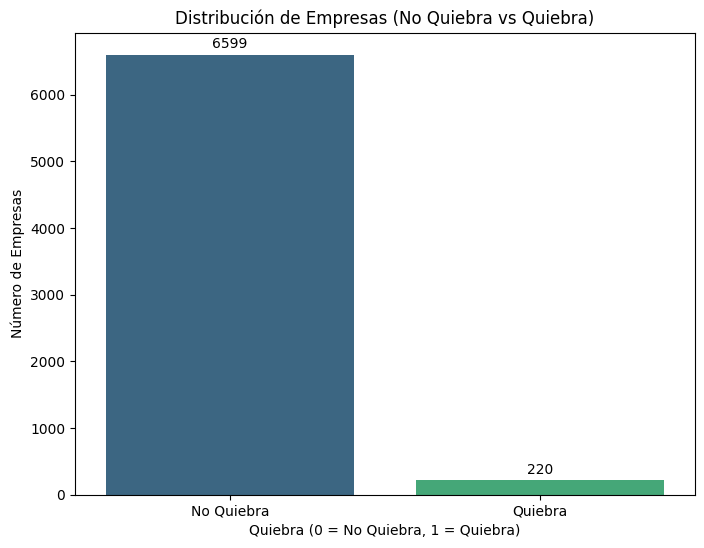

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [17]:
#Distribución de la Variable Objetivo (`Bankrupt?`)

plt.figure(figsize=(8, 6))
sns.countplot(x=TARGET_COLUMN, data=df, palette='viridis')
plt.title('Distribución de Empresas (No Quiebra vs Quiebra)')
plt.xlabel('Quiebra (0 = No Quiebra, 1 = Quiebra)')
plt.ylabel('Número de Empresas')
plt.xticks([0, 1], ['No Quiebra', 'Quiebra'])


for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
                   height + 50, # Un pequeño offset para que no se superponga
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=10)

plt.show()

# También mostrar las proporciones numéricamente
print(df[TARGET_COLUMN].value_counts(normalize=True))

--- Histogramas de Variables Numéricas Seleccionadas ---


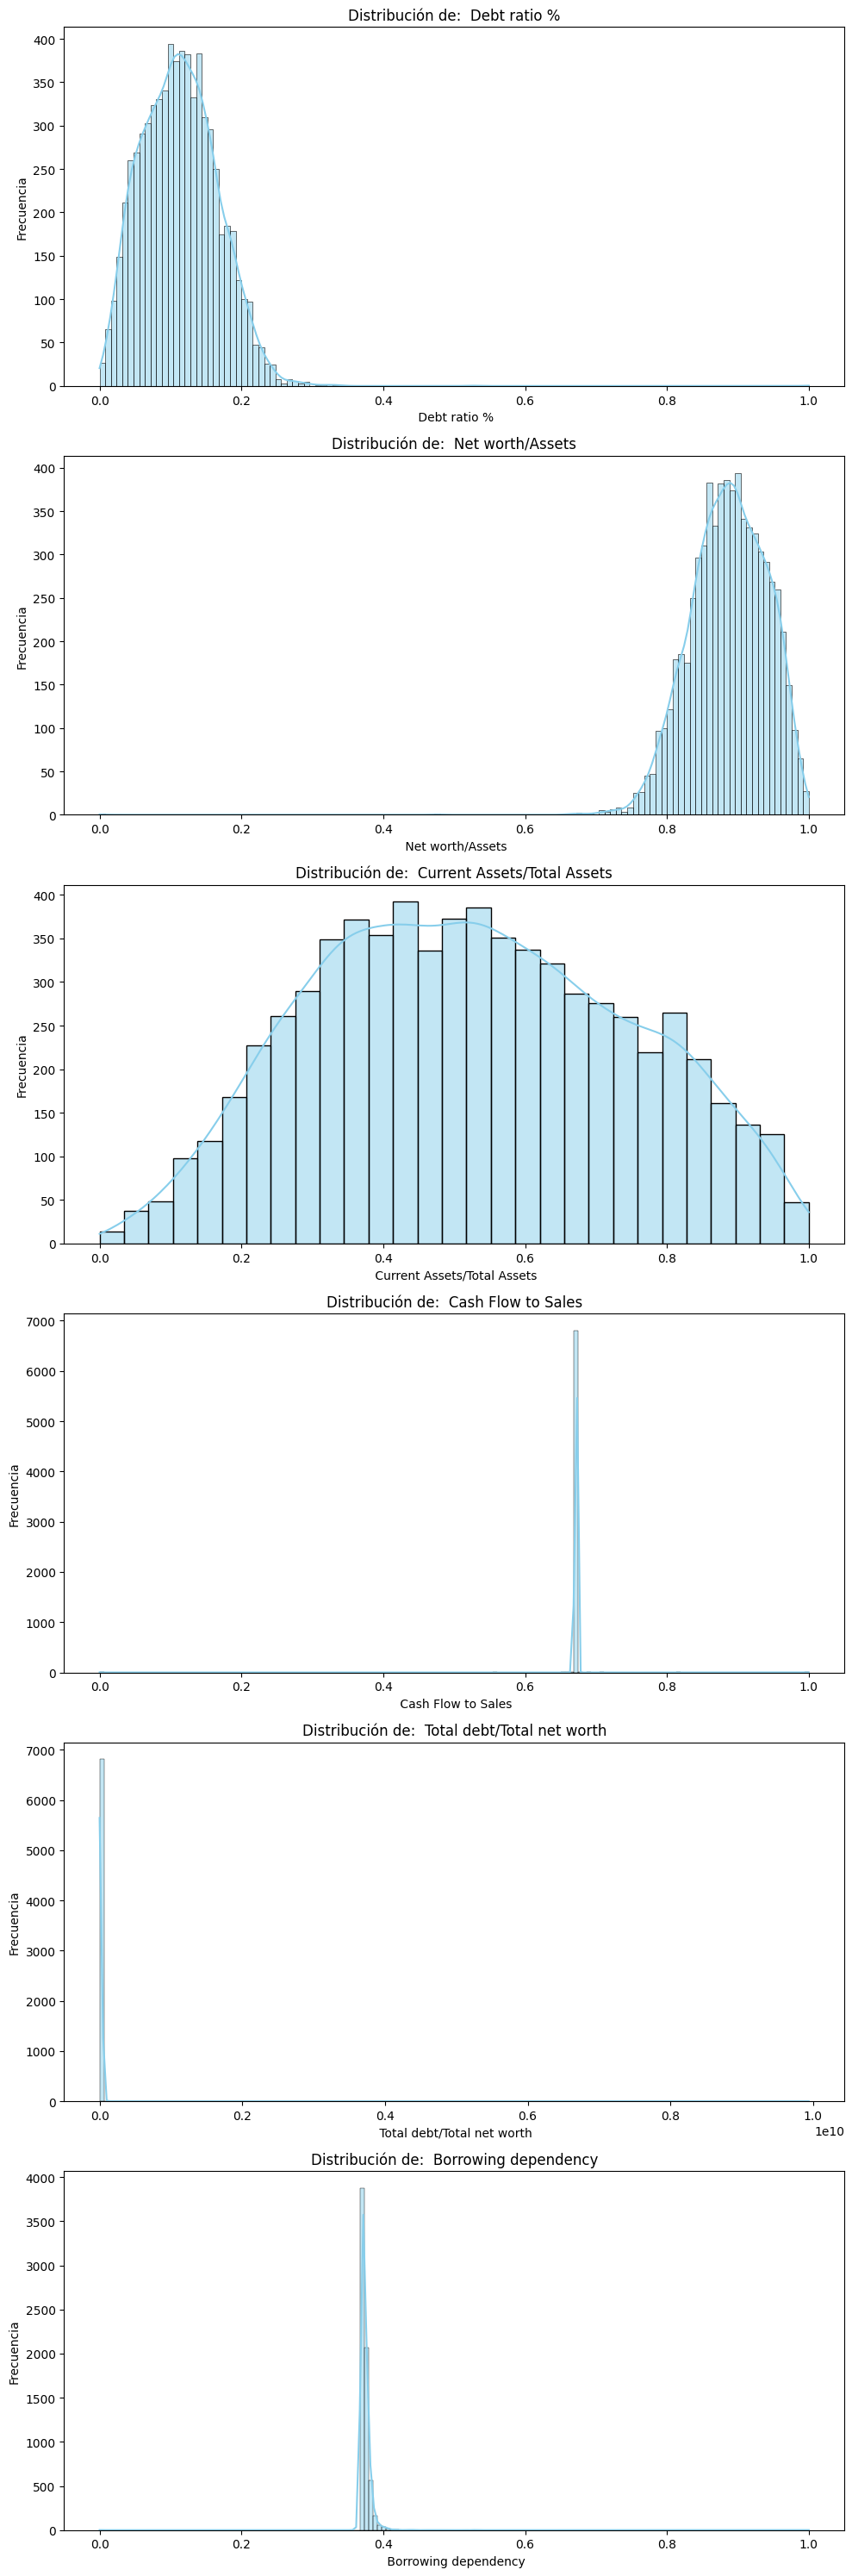


--- Boxplots de Variables Numéricas Seleccionadas por Clase de Quiebra ---


C:\Users\danie\AppData\Local\Temp\ipykernel_9908\2158591772.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COLUMN, y=col, data=df, ax=axes[i], palette='pastel')
C:\Users\danie\AppData\Local\Temp\ipykernel_9908\2158591772.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COLUMN, y=col, data=df, ax=axes[i], palette='pastel')
C:\Users\danie\AppData\Local\Temp\ipykernel_9908\2158591772.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COLUMN, y=col, data=df, ax=axes[i], palette='pastel')
C:\Users\danie\AppD

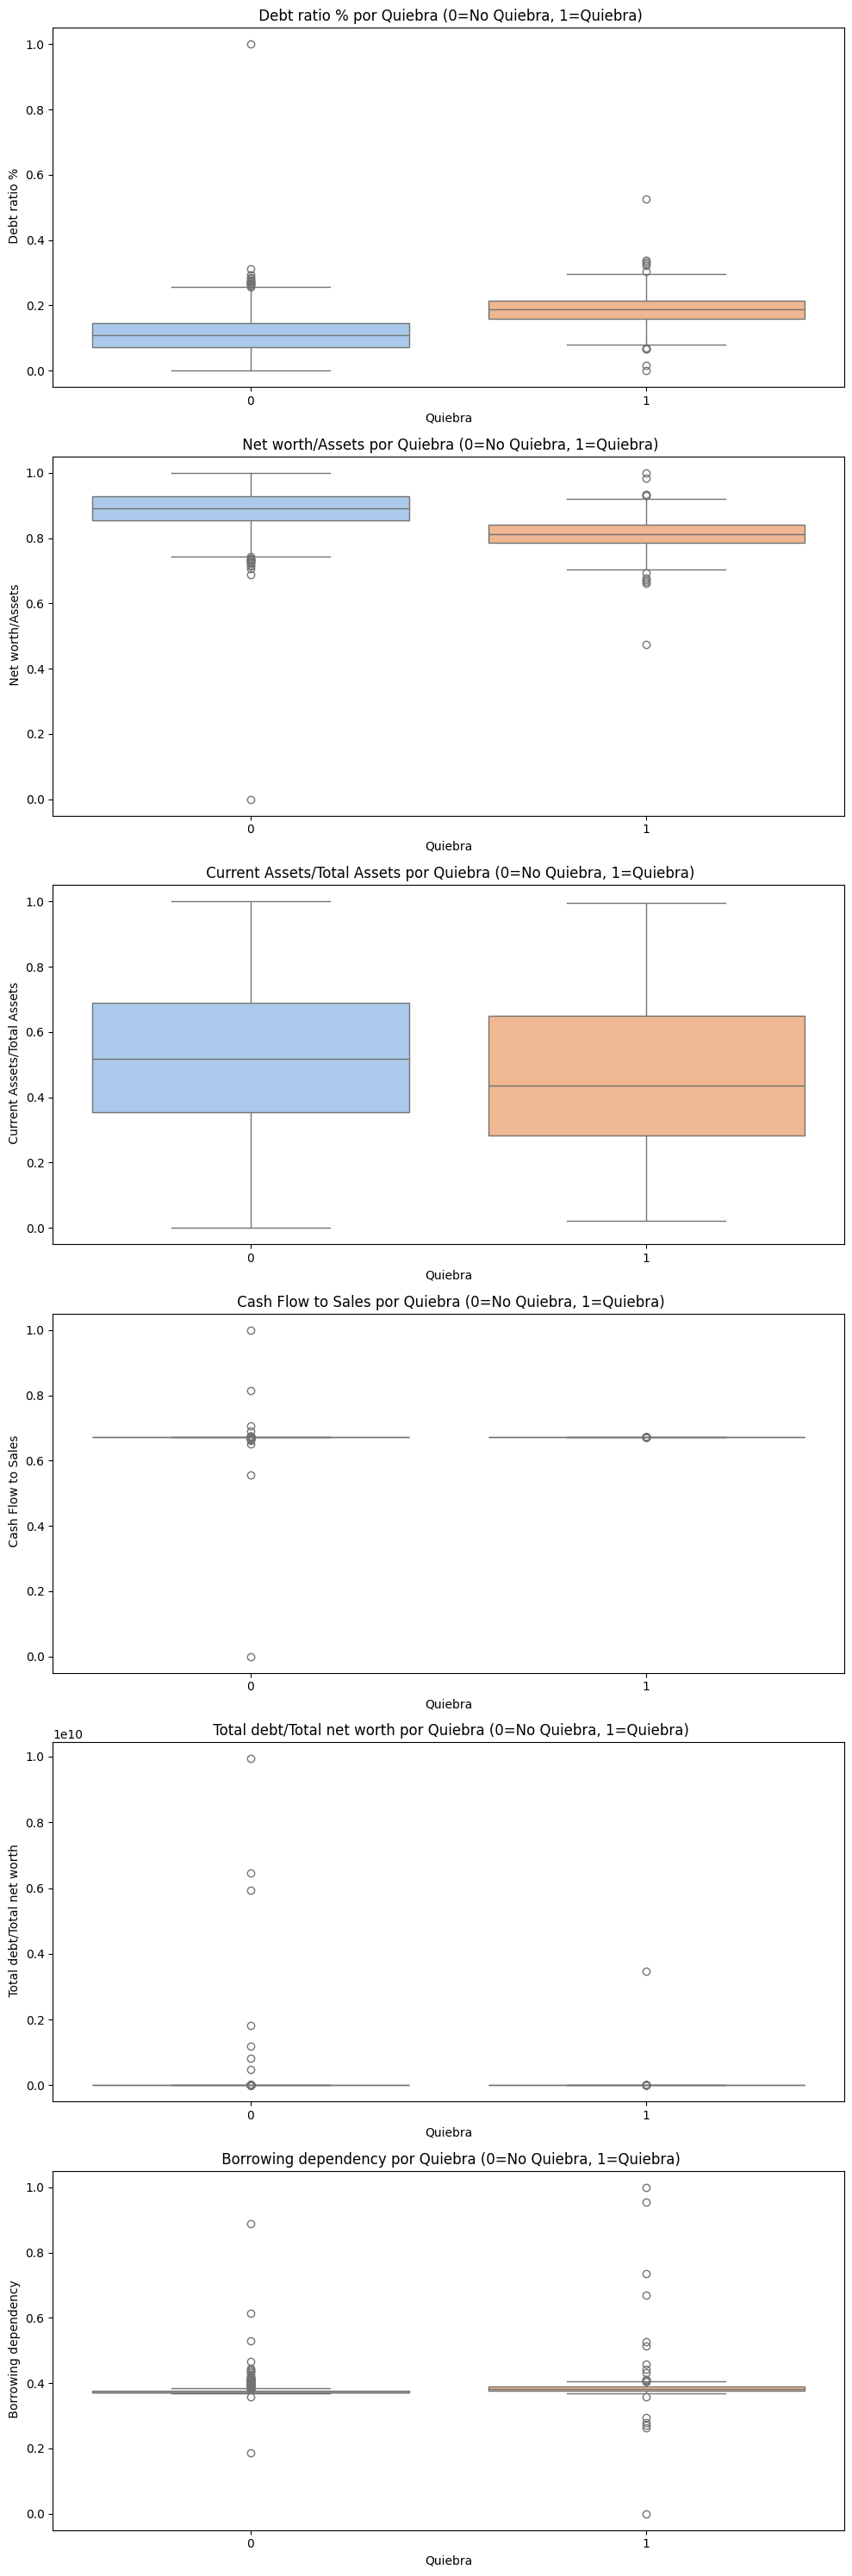

In [19]:
# Distribución de Variables Numéricas Clave

numeric_cols_for_eda = [
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Current Assets/Total Assets',
    ' Cash Flow to Sales',
    ' Total debt/Total net worth',
    ' Borrowing dependency' # Esta fue una de las que consideraste eliminar por correlación, pero es interesante ver su distribución.
]

# Eliminar el target de la lista si está
numeric_cols_for_eda = [col for col in numeric_cols_for_eda if col != TARGET_COLUMN]


# Histogramas para ver la forma de la distribución
print("--- Histogramas de Variables Numéricas Seleccionadas ---")
fig, axes = plt.subplots(nrows=len(numeric_cols_for_eda), ncols=1, figsize=(10, 5 * len(numeric_cols_for_eda)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_eda):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()


# Boxplots por clase de quiebra para identificar diferencias y outliers
print("\n--- Boxplots de Variables Numéricas Seleccionadas por Clase de Quiebra ---")
fig, axes = plt.subplots(nrows=len(numeric_cols_for_eda), ncols=1, figsize=(10, 5 * len(numeric_cols_for_eda)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_eda):
    sns.boxplot(x=TARGET_COLUMN, y=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} por Quiebra (0=No Quiebra, 1=Quiebra)')
    axes[i].set_xlabel('Quiebra')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show();


--- Correlación de Features con la Variable Objetivo ('Bankrupt?') ---
Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 Net worth/Assets                                          -0.250161
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
Name: Bankrupt?, Length: 95, dtype: float64


C:\Users\danie\AppData\Local\Temp\ipykernel_9908\2680703049.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.head(20).values, y=correlation_with_target.head(20).index, palette='coolwarm')


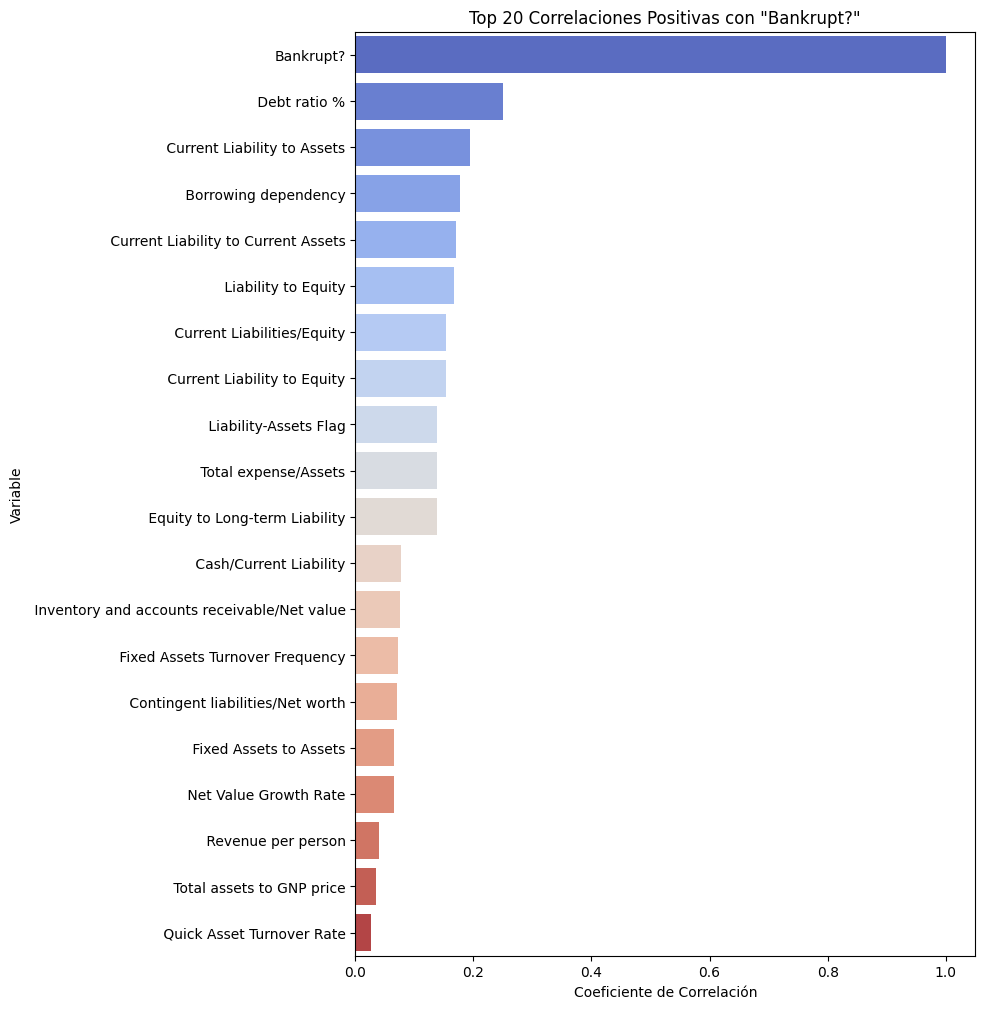

C:\Users\danie\AppData\Local\Temp\ipykernel_9908\2680703049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.tail(20).values, y=correlation_with_target.tail(20).index, palette='coolwarm')


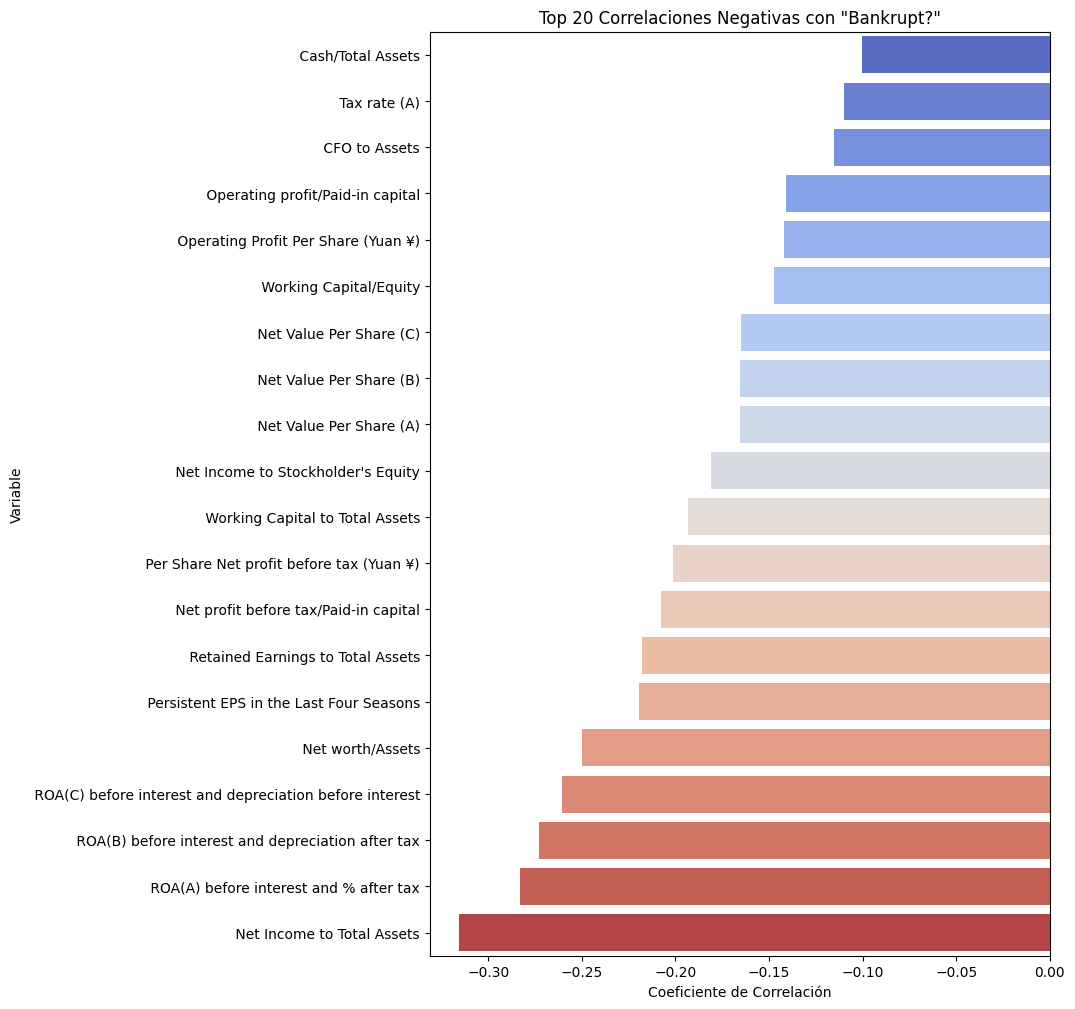

In [23]:
print("\n--- Correlación de Features con la Variable Objetivo ('Bankrupt?') ---")
correlation_with_target = df.corr(numeric_only=True)[TARGET_COLUMN].sort_values(ascending=False)
print(correlation_with_target)

# top N correlaciones con el target
plt.figure(figsize=(8, 12))
sns.barplot(x=correlation_with_target.head(20).values, y=correlation_with_target.head(20).index, palette='coolwarm')
plt.title('Top 20 Correlaciones Positivas con "Bankrupt?"')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.show()

plt.figure(figsize=(8, 12))
sns.barplot(x=correlation_with_target.tail(20).values, y=correlation_with_target.tail(20).index, palette='coolwarm')
plt.title('Top 20 Correlaciones Negativas con "Bankrupt?"')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.show()

--- Pairplot de Variables Seleccionadas con Distinción por Clase de Quiebra ---


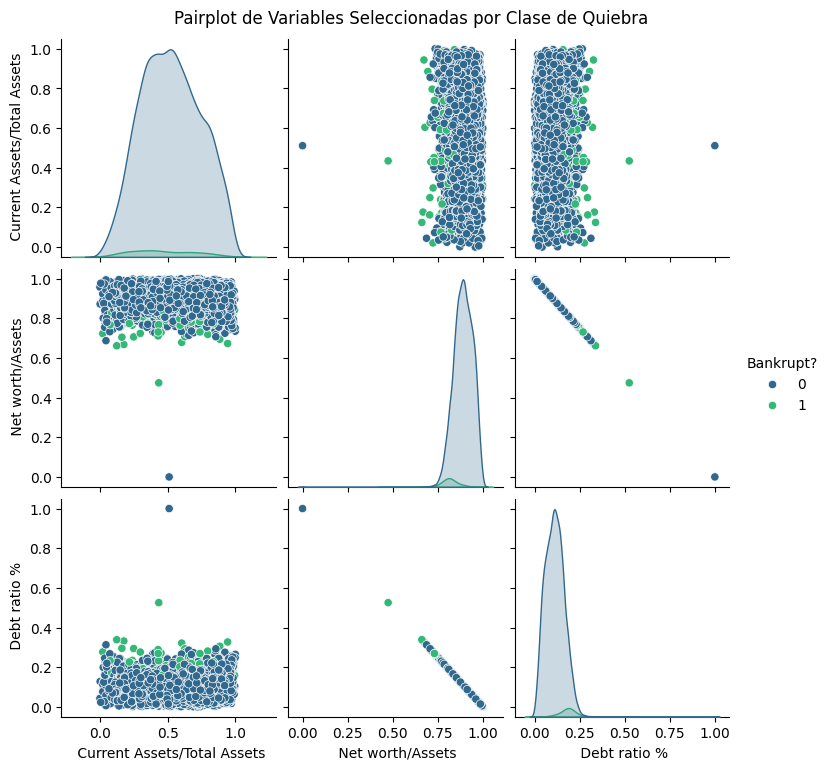

In [25]:
# Relaciones entre Variables Seleccionadas y el Target

selected_cols_for_pairplot = [
    ' Current Assets/Total Assets',
    ' Net worth/Assets',
    ' Debt ratio %',
    TARGET_COLUMN
]

# Asegúrate de que las columnas existan en df antes de intentar el pairplot
selected_cols_for_pairplot = [col for col in selected_cols_for_pairplot if col in df.columns]

if len(selected_cols_for_pairplot) > 1: # Asegurarse de que hay al menos 2 columnas + target
    print("--- Pairplot de Variables Seleccionadas con Distinción por Clase de Quiebra ---")
    sns.pairplot(df[selected_cols_for_pairplot], hue=TARGET_COLUMN, palette='viridis', diag_kind='kde')
    plt.suptitle('Pairplot de Variables Seleccionadas por Clase de Quiebra', y=1.02) # Ajustar el título
    plt.show()
else:
    print("No hay suficientes columnas seleccionadas para generar un pairplot.")

In [17]:
df_processed.describe()

,Bankrupt?,ROA(A) before interest and % after tax,Operating Gross Margin,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Total Assets,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.558625,0.607948,0.809084,0.303623,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,...,0.649731,0.593415,0.031506,0.001173,1.862942e+07,0.623915,0.280365,0.027541,0.565358,0.047578
std,0.176710,0.065620,0.016934,0.013601,0.011163,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.138667,...,0.047372,0.058561,0.030845,0.034234,3.764501e+08,0.012290,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.535543,0.600445,0.809312,0.303466,1.566874e-04,1.281880e-04,0.461558,2.030203e-04,0.000000,...,0.633265,0.565987,0.018034,0.000000,9.036205e-04,0.623636,0.276944,0.026791,0.565158,0.024477
50%,0.000000,0.559802,0.605997,0.809375,0.303525,2.777589e-04,5.090000e+08,0.465080,3.210321e-04,0.073489,...,0.645366,0.593266,0.027597,0.000000,2.085213e-03,0.623879,0.278778,0.026808,0.565252,0.033798
75%,0.000000,0.589157,0.613914,0.809469,0.303585,4.145000e+09,3.450000e+09,0.471004,5.325533e-04,0.205841,...,0.663062,0.624769,0.038375,0.000000,5.269777e-03,0.624168,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,...,1.000000,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000
